In [1]:
from osgeo import gdal, osr
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def raster2array(geotif_file):
    metadata = {}
    dataset = gdal.Open(geotif_file)
    metadata['array_rows'] = dataset.RasterYSize
    metadata['array_cols'] = dataset.RasterXSize
    mapinfo = dataset.GetGeoTransform()
    metadata['pixelWidth'] = mapinfo[1]
    metadata['pixelHeight'] = mapinfo[5]
    
    metadata['ext_dict'] = {}
    metadata['ext_dict']['xMin'] = mapinfo[0]
    metadata['ext_dict']['xMax'] = mapinfo[0] + dataset.RasterXSize/mapinfo[1]
    metadata['ext_dict']['yMin'] = mapinfo[3] + dataset.RasterYSize/mapinfo[5]
    metadata['ext_dict']['yMax'] = mapinfo[3]
    
    metadata['extent'] = (metadata['ext_dict']['xMin'],metadata['ext_dict']['xMax'],
                          metadata['ext_dict']['yMin'],metadata['ext_dict']['yMax'])
    raster = dataset.GetRasterBand(1)
    metadata['noDataValue'] = raster.GetNoDataValue()
    metadata['scaleFactor'] = raster.GetScale()
    array = dataset.GetRasterBand(1).ReadAsArray(0,0,metadata['array_cols'],metadata['array_rows']).astype(np.float)
#     array[array==int(metadata['noDataValue'])]=np.nan
    array = array/metadata['scaleFactor']
    return array, metadata

In [3]:
dtm_array, dtm_metadata = raster2array('geo-files/small_files/DTM17.tif')
dsm_array, dsm_metadata = raster2array('geo-files/small_files/DSM17.tif')
# surface_HARV = gdal.Open("geo-files/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif")
# terrain_HARV_UTM18 = gdal.Open("geo-files/DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif")

In [4]:
teak_chm = dsm_array - dtm_array;


In [5]:
teak_chm.shape

(900, 1700)

In [6]:
teak_chm[-5:][-5:]

array([[ 0.        ,  0.        ,  0.        , ...,  7.40999985,
        16.73999977, 17.05999947],
       [ 0.        ,  0.        ,  0.        , ..., 15.52999878,
        17.61000061, 16.94000244],
       [ 0.        ,  0.        ,  0.        , ..., 16.59000206,
        17.21999931, 17.24000168],
       [ 0.        ,  0.        ,  0.        , ..., 16.65999794,
        17.29000092, 16.97999954],
       [ 8.3399992 ,  0.        ,  0.        , ..., 17.12999916,
        17.69000244, 17.01999855]])

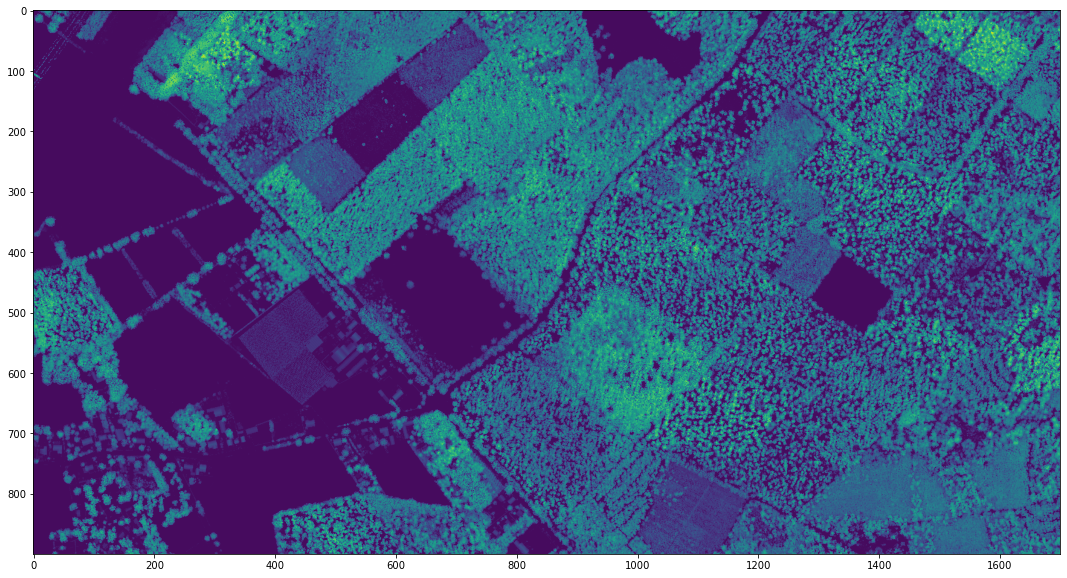

In [7]:
plt.figure(figsize=(20,10))
plt.imshow(teak_chm)


In [8]:
from mpl_toolkits import mplot3d

ny, nx = teak_chm.shape
x = np.arange(0,teak_chm.shape[0])
y = np.arange(0,teak_chm.shape[1])
xv, yv = np.meshgrid(x, y)
z = teak_chm[xv,yv]

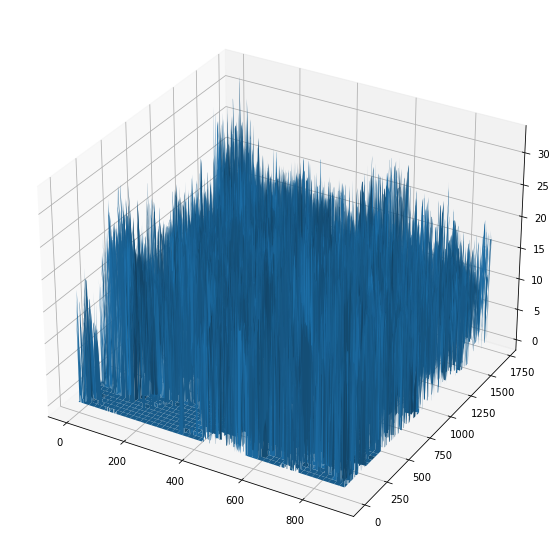

In [9]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
dem3d=ax.plot_surface(xv,yv,z)
plt.show()